# DIN-5032-2-Algorithmus

Berechne mithilfe von

In [1]:
%display plain #latex

In [2]:
Grad=pi/180
var('TagDesJahres')
ZahlDerTageImJahr=365
J = 360 * Grad * TagDesJahres / ZahlDerTageImJahr;

die Sonnendeklination

In [3]:
delta = (0.3948 
         - 23.2559 * cos(J + 9.1 * Grad)
         - 0.3915 * cos(2 * J + 5.4 * Grad)
         - 0.1764 * cos(3 * J + 26. * Grad)
        ) * Grad;
delta;

An diesen Gleichungen wird bereits deutlich, dass der Algorithmus nur ungefähre Ergebnisse liefern kann, da das Konzept der Schaltjahre und Schaltsekunden nicht berücksichtigt wird.

Bestimme die sogenannte Zeitgleichung

In [4]:
var('Stunden')
Minuten = Stunden / 60
Zgl = (0.0066 
       + 7.3525 * cos(J + 85.9 * Grad)
       + 9.9359 * cos(2 * J + 108.9 * Grad)
       + 0.3387 * cos(3 * J + 105.2 * Grad)
      ) * Minuten;
Zgl;

und aus der lokalen Zeit LZ und der Zeitzone (z.B. MEZ = UTC+1 oder MESZ = UTC+2) oder direkt aus der Weltzeit (UTC) in Abhängigkeit der geographischen Länge $\lambda$ die mittlere Ortszeit

In [5]:
var('LZ')
var('Zeitzone')
var('Laengengrad')
UTC = LZ - Zeitzone
MOZ= UTC - 4 * (0 * 15 * Grad - Laengengrad) * Minuten / Grad;
MOZ;

und damit die wahre Ortszeit, welche die Schwankungen der Erdrotation berücksichtigt,

In [6]:
WOZ = MOZ + Zgl;
WOZ;

Durch die geographische Breite $\varphi$ und den Stundenwinkel

In [7]:
Stundenwinkel = (12 * Stunden - WOZ) * 15 * Grad / Stunden;
Stundenwinkel;

lassen sich Sonnenhöhe und –azimut berechnen

In [8]:
var('Breitengrad')
Sonnenhoehe = arcsin(
    cos(Stundenwinkel) * cos(Breitengrad) * cos(delta)
    + sin(Breitengrad) * sin(delta)
    );
Sonnenhoehe;
Sonnenazimut = (180 * Grad 
    + sign(WOZ / Stunden - 12)
    * arccos(
        (sin(Sonnenhoehe) * sin(Breitengrad) - sin(delta))
        / (cos(Sonnenhoehe) * cos(Breitengrad))
        )
    );
Sonnenazimut;

## Rechenaufgabe:

Bestimme den heutigen Sonnenweg am DBI-TZ! Ein Vergleich kann mit dem Online-Angebot von [Sonnenverlauf.de](https://www.sonnenverlauf.de/#/50.93,13.35,17/2017.09.22/15:10/1/0) vorgenommen werden.

Dafür wird zunächst die lokale Zeit bestimmt.

In [9]:
import datetime as dt
MEZ = + 1 * Stunden
MESZ = + 2 * Stunden
ZZ = MEZ
Jetzt = dt.datetime.utcnow() + dt.timedelta(hours = int(ZZ / Stunden));
#Jetzt = dt.datetime(2017,10,24,9,30)
Jetzt;
LokaleZeit = (Jetzt.hour + Jetzt.minute / 60) * Stunden;
'Seit Beginn des Tages sind {:.5} Stunden vergangen.'.format((LokaleZeit/Stunden).n())

'Seit Beginn des Tages sind 17.26 Stunden vergangen.'

Dann brauchen wir die Information, welchen Tag des Jahres wir heute haben.

In [10]:
Heute = (Jetzt.date() - dt.date(Jetzt.year,1,1)).days + 1;
'Heute haben wir den {}. Tag des Jahres.'.format(Heute)

'Heute haben wir den 320. Tag des Jahres.'

Nun können wir einige der Funktionen von oben testen. Wenn möglich, liefert die Methode n() eine numerische Näherung des symbolischen Ausdruckes.

In [11]:
'Die Sonnenumrundung hat {:.5} Grad erreicht.'.format( (J(TagDesJahres = Heute) / Grad).n() )

'Die Sonnenumrundung hat 315.6 Grad erreicht.'

In [12]:
'Die Abweichung des Sonnenstandes ist heute etwa {:.5} Grad.'.format((delta(TagDesJahres = Heute) / Grad).n() )

'Die Abweichung des Sonnenstandes ist heute etwa -18.5 Grad.'

Über das Jahr gesehen hat die Abweichung folgenden Verlauf.

In [13]:
Deltadiagram = plot(delta.function(TagDesJahres) / Grad, 0, 365)
Deltadiagram.axes_labels(['Tag des\n Jahres',u'Sonnendeklination\n in °'])
Deltadiagram;

In [14]:
'Die Abweichung von der Sonnenzeit ist heute {:.5} Minuten.'.format( (Zgl(TagDesJahres = Heute) / Minuten).n() )

'Die Abweichung von der Sonnenzeit ist heute 15.13 Minuten.'

Über das Jahr gesehen hat die Zeitgleichung folgenden Verlauf.

In [15]:
Zgldiagramm = plot(Zgl.function(TagDesJahres) / Minuten, 0, 365)
Zgldiagramm.axes_labels(['Tag des\n Jahres','Abweichung von der\n Sonnenzeit in Minuten'])
Zgldiagramm;

Für die Berechnung der anderen Gleichungen ist der geographische Standort entscheidend. Dafür werden der Längengrad $l$ und der Breitengrad $b$ des DBI-TZ verwendet.

In [16]:
l = 13.35 * Grad;
l.n();

In [17]:
b = 50.93 * Grad;
b.n();

Um herauszufinden von welchen Variablen ein Ausdruck abhängt, kann nach den Argumenten des Ausdrucks gefragt werden.

In [18]:
MOZ.arguments()

(LZ, Laengengrad, Stunden, Zeitzone)

Hier ersetzen wir den Längengrad und die Zeitzone durch unsere Werte und erhalten einen vereinfachten Ausdruck mittels `gp`.

In [19]:
gp(
    MOZ.subs({
        Laengengrad:l
        ,Zeitzone:ZZ
    })
)

LZ - 0.1099999999999998800000000000*Stunden

In [20]:
WOZ.arguments()

(LZ, Laengengrad, Stunden, TagDesJahres, Zeitzone)

In [21]:
gp(
    WOZ.subs({    
        TagDesJahres:Heute
        ,Laengengrad:l
        ,Zeitzone:ZZ
        ,LZ:LokaleZeit
    })
)

17.40899792971162894363146246*Stunden

In [22]:
Stundenwinkel.arguments()

(LZ, Laengengrad, Stunden, TagDesJahres, Zeitzone)

In [23]:
gp(
    Stundenwinkel.subs({    
        TagDesJahres:Heute
        ,Laengengrad:l
        ,Zeitzone:ZZ
        ,LZ:LokaleZeit
    })
)/Grad

-81.13496894567446665447193696

In [24]:
gp(delta(TagDesJahres=Heute))/Grad

-18.58227218236989575008027027

In [25]:
Sonnenhoehe.arguments()

(Breitengrad, LZ, Laengengrad, Stunden, TagDesJahres, Zeitzone)

Wir schreiben nun die heutige Sonnenhöhe am DBI-TZ zur Sommerzeit als Funktion der lokalen Zeit.

In [26]:
SH=(
    Sonnenhoehe.subs({    
        TagDesJahres:Heute
        ,LZ:LZ*Stunden
        ,Laengengrad:l
        ,Breitengrad:b
        ,Zeitzone:ZZ
    })/Grad
).function(LZ)
Hoehe = SH(LokaleZeit/Stunden).n()
'Zur Zeit steht die Sonne in einem Winkel von etwa {:.5} Grad ueber dem DBI-TZ.'.format(Hoehe)

'Zur Zeit steht die Sonne in einem Winkel von etwa -8.93 Grad ueber dem DBI-TZ.'

Natürlich können wir mit unseren Gleichungen auch den Zeitpunkt des Sonnenauf- und -untergangs berechnen, indem wir die Nulldurchgänge der Sonnenhöhe am Vormittag und Nachmittag bestimmen.

In [27]:
Sonnenaufgang = find_root(SH(LZ),0,12)
Sonnenuntergang = find_root(SH(LZ),12,24)
'Sonnenaufgang war etwa um {:.4} und Sonnenuntergang wird etwa um {:.5} sein.'.format(
    dt.timedelta(hours=Sonnenaufgang)
    ,dt.timedelta(hours=Sonnenuntergang)
    )

'Sonnenaufgang war etwa um 7:29 und Sonnenuntergang wird etwa um 16:13 sein.'

Wir können auch den Sonnenhöchststand ermitteln, indem wir die folgende Extremwertaufgabe lösen.

In [28]:
Mittag = find_root(diff(SH(LZ),LZ),Sonnenaufgang,Sonnenuntergang)
'Der Sonnenhoeststand ist heute um {:.5}.'.format(dt.timedelta(hours=Mittag))

'Der Sonnenhoeststand ist heute um 11:51.'

In [29]:
Sonnenazimut.arguments()

(Breitengrad, LZ, Laengengrad, Stunden, TagDesJahres, Zeitzone)

In [30]:
SA=(
    Sonnenazimut.subs({    
        TagDesJahres:Heute
        ,LZ:LZ*Stunden
        ,Laengengrad:l
        ,Breitengrad:b
        ,Zeitzone:ZZ
    }).subs(Stunden=1)/Grad
).function(LZ)
Azimut = SA(LokaleZeit/Stunden).n()
'Zur Zeit steht die Sonne im Azimut von {:.5} Grad.'.format(Azimut)

'Zur Zeit steht die Sonne im Azimut von 251.4 Grad.'

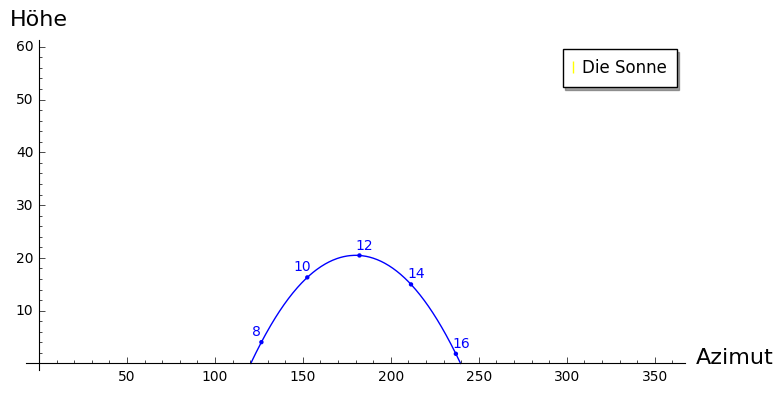

In [31]:
Zeit=var('Zeit')
aspectratio = 3
durchmesser = 10
StundenListe = srange(12-6, 12+10, 2)
G = Graphics()
Sonnenwegdiagram = parametric_plot( (SA(Zeit), SH(Zeit)), (Zeit, Sonnenaufgang, Sonnenuntergang ) )
SonnenwegdiagramStunden = point( [(SA(Zeit), SH(Zeit)) for Zeit in StundenListe] )
Sonne = ellipse((Azimut,Hoehe),durchmesser,durchmesser / aspectratio,rgbcolor='yellow', fill=True, legend_label='Die Sonne')
G += Sonnenwegdiagram
G += SonnenwegdiagramStunden
for Zeit in StundenListe:
    if SH(Zeit) > -5:
        da = 3
        if Zeit < 12: da = -3
        G += text('{}'.format(Zeit),(SA(Zeit) + da, SH(Zeit) + 6 / aspectratio))
G += Sonne
G.axes_range(0,360,0,60)
G.axes_labels(['Azimut',u'Höhe'])
G.set_aspect_ratio(aspectratio)
G.show()